In [1]:
import os
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from tqdm import tqdm
from PIL import Image

DATA_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'

print("Проверка существования папки:", os.path.exists(DATA_DIR))
print("Количество папок-классов:", len(os.listdir(DATA_DIR)))

Проверка существования папки: True
Количество папок-классов: 1000


In [2]:


IMAGES_DIR = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/images'

print("Путь существует?", os.path.exists(IMAGES_DIR))
print("Количество элементов в папке images:", len(os.listdir(IMAGES_DIR)))

print("Первые 10 элементов:")
print(os.listdir(IMAGES_DIR)[:10])

folders = [f for f in os.listdir(IMAGES_DIR) if os.path.isdir(os.path.join(IMAGES_DIR, f))]
print("Количество папок-классов:", len(folders))

Путь существует? True
Количество элементов в папке images: 1000
Первые 10 элементов:
['n01531178', 'n02412080', 'n02098413', 'n01797886', 'n04589890', 'n02437312', 'n03976657', 'n07716358', 'n03461385', 'n07753592']
Количество папок-классов: 1000


In [3]:
from torchvision.datasets import ImageFolder

dataset = ImageFolder(IMAGES_DIR)

print("Успешно загружено!")
print("Количество классов:", len(dataset.classes))
print("Всего изображений:", len(dataset))
print("Первые 5 классов (WNID):", dataset.classes[:5])

Успешно загружено!
Количество классов: 1000
Всего изображений: 3923
Первые 5 классов (WNID): ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475']


In [4]:
import json

json_path = '/kaggle/input/datasets/deeptrial/miniimagenet/ImageNet-Mini/imagenet_class_index.json'

with open(json_path, 'r') as f:
    mapping = json.load(f)  # {"0": ["n01440764", "tench"], "1": ["n01443537", "goldfish"], ...}

# dict wind name
wnid_to_name = {}
for idx_str, (wnid, name) in mapping.items():
    wnid_to_name[wnid] = name

# Названия классов
class_names = []
for wnid in dataset.classes:  # dataset.classes — это список WNID из ImageFolder
    name = wnid_to_name.get(wnid, 'Неизвестно')
    class_names.append(name)

# Проверяем
print("Первые 10 нормальных названий классов:")
for i in range(10):
    print(f"{i:3d}: {dataset.classes[i]} → {class_names[i]}")

# Поиск мышей и грызунов
mouse_classes = [name for name in class_names if 'rat' in name.lower()]
print("\nКлассы с 'rat' в названии:", mouse_classes if mouse_classes else "Нет ни одного! (пробел в полноте)")

rodent_keywords = ['mouse', 'rat', 'hamster']
rodent_classes = [
    name for name in class_names 
    if any(keyword.lower() in name.lower().split() or keyword.lower() == name.lower() for keyword in rodent_keywords)
]
print("Некоторые грызуны в датасете:")
print(rodent_classes if rodent_classes else "Нет!")


Первые 10 нормальных названий классов:
  0: n01440764 → tench
  1: n01443537 → goldfish
  2: n01484850 → great_white_shark
  3: n01491361 → tiger_shark
  4: n01494475 → hammerhead
  5: n01496331 → electric_ray
  6: n01498041 → stingray
  7: n01514668 → cock
  8: n01514859 → hen
  9: n01518878 → ostrich

Классы с 'rat' в названии: ['triceratops', 'crate', 'pirate', 'refrigerator']
Некоторые грызуны в датасете:
['hamster', 'mouse']


Баланс классов — общая статистика:
count    1000.0
mean        3.9
std         1.5
min         1.0
25%         3.0
50%         4.0
75%         4.0
max        14.0
Name: count, dtype: float64

Всего классов: 1000
Минимальное количество изображений в классе: 1
Максимальное количество изображений в классе: 14
Среднее на класс: 3.9

10 самых редких классов:
                 name  count       wnid
935     mashed_potato      1  n07711569
564       four-poster      1  n03388549
594              harp      1  n03495258
695           padlock      1  n03874599
122  American_lobster      1  n01983481
73        barn_spider      1  n01773549
71           scorpion      1  n01770393
963             pizza      2  n07873807
901       whiskey_jug      2  n04579145
885            velvet      2  n04525038

10 самых частых классов:
               name  count       wnid
550  espresso_maker     14  n03297495
902         whistle     13  n04579432
291            lion     12  n02129165
371           patas     11

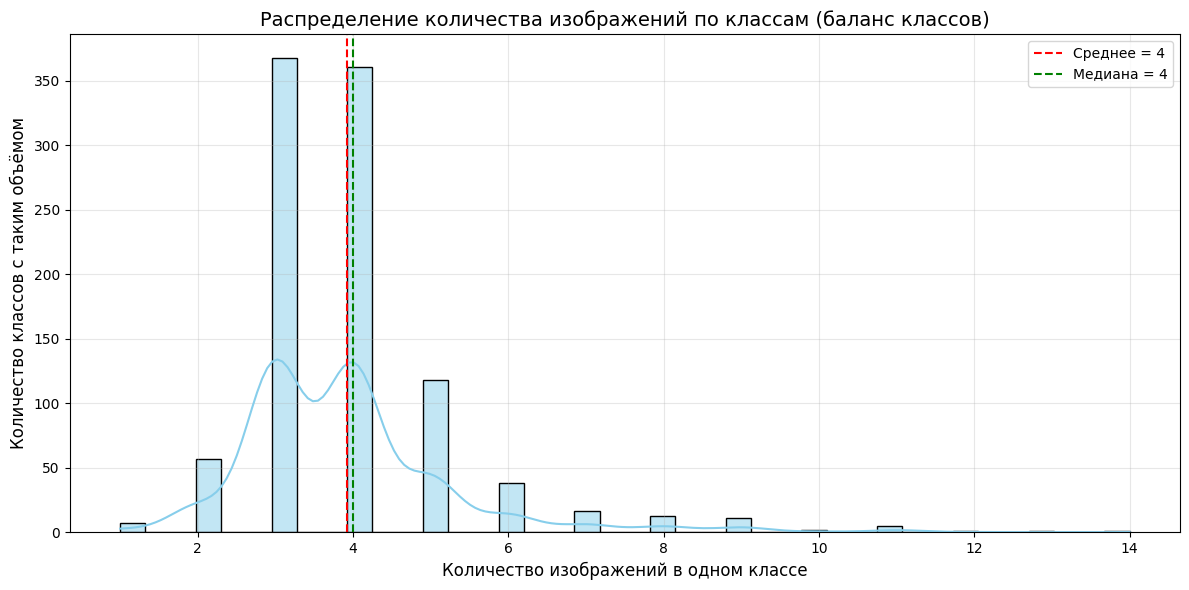

In [5]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

dataset = ImageFolder(IMAGES_DIR)

# Подсчёт количества изображений по классам
labels = [label for _, label in dataset.imgs]           # или dataset.targets, если доступно
class_counts = Counter(labels)


df_balance = pd.DataFrame({
    'class_index': range(len(dataset.classes)),
    'wnid': dataset.classes,
    'name': class_names,# из  json
    'count': [class_counts.get(i, 0) for i in range(len(dataset.classes))]
}).sort_values('count')

# Основная статистика
print("Баланс классов — общая статистика:")
print(df_balance['count'].describe().round(1))
print("\nВсего классов:", len(df_balance))
print("Минимальное количество изображений в классе:", df_balance['count'].min())
print("Максимальное количество изображений в классе:", df_balance['count'].max())
print("Среднее на класс:", df_balance['count'].mean().round(1))

# 10 самых редких и самых частых
print("\n10 самых редких классов:")
print(df_balance.head(10)[['name', 'count', 'wnid']])

print("\n10 самых частых классов:")
print(df_balance.tail(10)[['name', 'count', 'wnid']].sort_values('count', ascending=False))

# Гистограмма распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=df_balance, x='count', bins=40, kde=True, color='skyblue')
plt.title('Распределение количества изображений по классам (баланс классов)', fontsize=14)
plt.xlabel('Количество изображений в одном классе', fontsize=12)
plt.ylabel('Количество классов с таким объёмом', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавим вертикальные линии для наглядности
plt.axvline(df_balance['count'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Среднее = {df_balance["count"].mean():.0f}')
plt.axvline(df_balance['count'].median(), color='green', linestyle='--', linewidth=1.5, label=f'Медиана = {df_balance["count"].median():.0f}')
plt.legend()

plt.tight_layout()
plt.show()

Покрытие классов - нет класса rat
Баланс классов - крайне низкая репрезентативность, малое количество изображения в классах,
не пригоден для обучения больших сетей
Пропуски и качество данных - 
Разнообразие внутри классов


In [6]:
from PIL import Image
import os
from tqdm import tqdm
import pandas as pd


# Списки для отчёта
corrupted_files = []          # битые/неоткрываемые
missing_files = []            # файлы, которых физически нет
class_stats = []              # статистика по классам

# Проходим по всем папкам-классам
for class_folder in tqdm(os.listdir(IMAGES_DIR)):
    class_path = os.path.join(IMAGES_DIR, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    images_in_class = []
    bad_in_class = 0
    
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        
        # Проверка 1: существует ли файл вообще
        if not os.path.exists(img_path) or not os.path.isfile(img_path):
            missing_files.append(img_path)
            continue
        
        # Только изображения
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        
        images_in_class.append(img_file)
        
        # Проверка 2: открывается ли и целостный ли файл
        try:
            with Image.open(img_path) as img:
                img.verify()          # проверка целостности
                           
        except Exception as e:
            corrupted_files.append({
                'class': class_folder,
                'file': img_file,
                'error': str(e)
            })
            bad_in_class += 1
    
    # Статистика по классу
    class_stats.append({
        'wnid': class_folder,
        'name': wnid_to_name.get(class_folder, 'Неизвестно'),  
        'total_found': len(images_in_class),
        'corrupted': bad_in_class
    })

# Итоговый отчёт
df_stats = pd.DataFrame(class_stats)

print("\nИтоговый отчёт по качеству данных:")
print(f"Всего классов проверено: {len(df_stats)}")
print(f"Всего файлов-изображений найдено: {df_stats['total_found'].sum()}")
print(f"Пропущенных файлов (не существуют): {len(missing_files)}")
print(f"Битых/повреждённых изображений: {len(corrupted_files)} ({len(corrupted_files)/df_stats['total_found'].sum()*100:.2f}% от найденных)")

if len(corrupted_files) > 0:
    print("\nПримеры повреждённых файлов (первые 5):")
    for item in corrupted_files[:5]:
        print(f"Класс: {item['class']}, Файл: {item['file']}, Ошибка: {item['error']}")
else:
    print("\nПовреждённых изображений нет.")

# Классы с проблемами (если есть)
if df_stats['corrupted'].sum() > 0:
    print("\nКлассы с битыми файлами:")
    print(df_stats[df_stats['corrupted'] > 0][['name', 'wnid', 'corrupted']].sort_values('corrupted', ascending=False))

100%|██████████| 1000/1000 [00:17<00:00, 58.44it/s]


Итоговый отчёт по качеству данных:
Всего классов проверено: 1000
Всего файлов-изображений найдено: 3923
Пропущенных файлов (не существуют): 0
Битых/повреждённых изображений: 0 (0.00% от найденных)

Повреждённых изображений нет.
